# 평균 이동
#### k-평균과 유사하게 군집을 중심으로 움직이면서 군집화를 수행한다.
#### 하지만 k-평균은 중심에 소속된 데이터의 평균 거리 중심으로 이동
#### 평균 이동은 중심을 데이터가 모여 있는 밀도가 가장 높은 곳으로 이동

#### 평균 이동 군집화는 데이터의 분포도를 이용해 군집 중심점을 찾는데, 이를 위해 확률 밀도 함수(probability density function) 이용
#### 가장 집중적으로 데이터가 모여있어 확률 밀도 함수가 피크인 점을 군집 중심점으로 선정
#### 그래서, 모델의 확률 밀도 함수를 찾기 위해서 KDE(Kernel Density Estimation)이용

#### 평균 이동 군집화는 특정 데이터를 반경 내의 데이터 분포 확률 밀도가 가장 높은 곳으로 이동하기 위해 주변 데이터와의 거리 값을 KDE 함수 값으로 입력한 뒤 그 반환 값을 현재 위치에서 업데이트하면서 이동하는 방식을 취한다.
#### 해당 방식을 전체 데이터에 반복적으로 적용하면서 데이터의 군집 중심점을 찾는다.

#### 데이터의 군집 중심점 찾는 과정
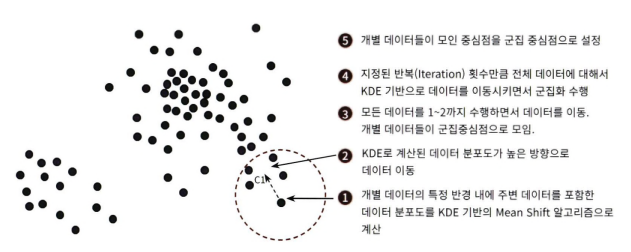

#### 위에서 나온 용어 중 KDE와 PDF에 대해서 자세히 설명한다.
#### KDE는 커널 함수를 통해 어떤 변수의 확률 밀도 함수를 추정하는 대표적인 방법이다. 관측된 데이터 각각에 커널 함수를 적용한 값을 모두 더한 뒤 데이터 건수로 나눠 확률 밀도 함수를 추정한다. 대표적인 커널 함수는 가우시안 분포 함수가 사용된다.
#### 확률 밀도 함수 PDF는 확률 변수의 분포를 나타내는 함수로, 정규분포 함수/감마 분포, T-분포 등이 있다. 확률 밀도 함수를 알면 특정 변수가 어떤 값을 갖게 될지에 대한 확률을 알게 되므로 이를 통해 변수의 특성 등 많은 요소를 알 수 있다.

#### 왼쪽은 개별 관측 데이터에 커널 함수를 적용한 것이고, 오른쪽은 적용 값을 모두 더한 KDE값이다.
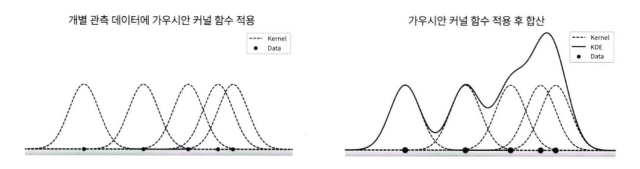

#### KDE는 다음과 같은 커널 함수식으로 표현된다. K는 커널 함수, x는 확률 변숫값, xi는 관측값, h는 대역폭이다.
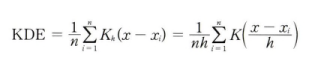

#### 대역폭 h는 KDE 형태를 좌우하는데, h를 어떻게 설정하느냐에 따라 확률  밀도 추정 성능을 크게 좌우한다.
#### h 값을 작게하면, 좁고 뾰족한 KDE를 갖게 되며 과적합하기 쉽다
#### 반대로 h 값을 크게하면, 넓고 지나치게 단순한 KDE를 갖게 되며 과소적합하기 쉽다.
#### 그래서 대역폭 h를 계산하는 것이 평균 이동 군집화에서 매우 중요하다.
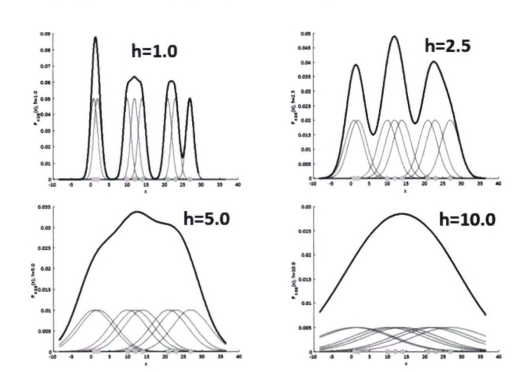

#### 일반적으로 평균 이동 군집화는 대역폭(h)가 클수록 평활화된 KDE로 인해 적은 수의 군집 중심점을 가지고, 대역폭이 적을수록 많은 수의 군집 중심점을 가진다.
#### 또한 평균 이동 군집화는 군집의 개수를 지정하지 않고, 오직 대역폭의 크기에 따라 군집화를 수행한다.
#### 사이킷런은 평균 이동 군집화를 위해 MeanShift 클래스를 제공하고, 대역폭으로 가장 중요한 파라미터인 bandwidth를 제공한다.
#### 그리고, 최적의 대역폭 계산을 위해 estimate_bandwidth() 함수를 제공한다.

#### 아래 예제는, make_blobs()의 cluster_std를 0.7로 정한 3개 군집의 데이터를 대해 bandwidth를 0.8로 설정한 평균 이동 군집화 알고리즘을 적용한 예제이다.

In [3]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.7, random_state=0)

meanshift = MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형 : ', np.unique(cluster_labels))

cluster labels 유형 :  [0 1 2 3 4 5]


#### 군집이 0부터 5까지 6개로 분류되었다. 지나치게 세분화되어서 bandwidth(대역폭)을 1.0으로 높여서 수행해보자

In [4]:
meanshift = MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형 : ', np.unique(cluster_labels))

cluster labels 유형 :  [0 1 2]


#### 3개의 군집을 잘 군집화되었다.
#### 최적의 대역폭 계산을 위해 estimate_bandwidth() 함수를 사용해서 구해보자

In [6]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
print('bandwidth 값 : ', round(bandwidth, 3))

bandwidth 값 :  1.816


In [10]:
import pandas as pd

clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

# estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X)

meanshift= MeanShift(bandwidth=best_bandwidth)

cluster_labels = meanshift.fit_predict(X)
print( 'cluster labels 유형 : ',np.unique(cluster_labels))

cluster labels 유형 :  [0 1 2]


#### 3개의 군집으로 구성되었음을 알 수 있고, 시각화를 진행한다.

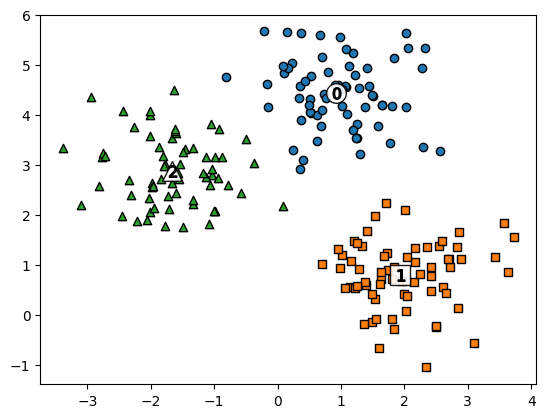

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF['meanshift_label']  = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'x', '*']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = centers[label]
    # 군집별로 다른 marker로 scatter plot 적용
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', 
                marker=markers[label] )
    
    # 군집별 중심 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                edgecolor='k', alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)
    
plt.show()

In [12]:
print(clusterDF.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: meanshift_label, dtype: int64


#### target 값과 군집 label 값이 1:1로 잘 매칭되었다.

#### 평균 이동의 장점은 유연한 군집화 가능, 이상치의 영향력이 크지 않고, 미리 군집의 개수를 정할 필요가 없다
#### 그대신 단점은 알고리즘의 수행 시간이 오래 걸리고 무엇보다도 bandwidth의 크기에 따른 군집화 영향도가 매우 크다.

#### 이 같은 특징 때문에 평균 이동 군집화 기법은 분석 업무 기반의 데이터 세트보다는 컴퓨터 비전에서 더 많이 사용된다.
#### 이미지나 영상 데이터에서 특정 개체를 구분하거나 움직임을 추적하는 데 뛰어난 역할을 수행하는 알고리즘이다.